## <font color='#FBD5AB'>Understanding Our Data</font>

### Loading the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf_ols

import warnings
warnings.filterwarnings("ignore")

### Loading the main dataset. 

In [2]:
data = pd.read_csv("../Data Sets/Data for Modelling.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.index=data['DATE']
data = data.drop(columns=['Unnamed: 0', "DATE"])

## <font color='#FBD5AB'>Exploratory Data Analysis</font>

#### Below we use Exponential Smoothing functions to decompose the dataset into different components:

- `General trend`
- `Seasonal trend`

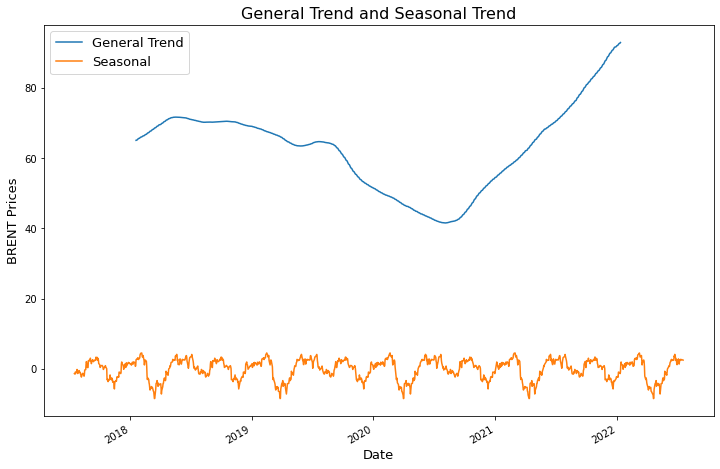

In [8]:
### Decomposing our time series using ETS
decomposition = sm.tsa.seasonal_decompose(data['BRENT'], model='additive', period=260)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('General Trend and Seasonal Trend', fontsize=16)

# plot general trend
decomposition.trend.plot(ax=ax, legend=False)
decomposition.seasonal.plot(ax=ax, legend=False)

ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('BRENT Prices', fontsize= 13)
ax.legend(['General Trend', 'Seasonal'], fontsize=13)
plt.show()


### Seasonal pattern and COVID caused a dip

#### <center><font color='#BAB86C'>Looking at Partial Autocorrelation Plots on Understand Relation With Lags</font></center>

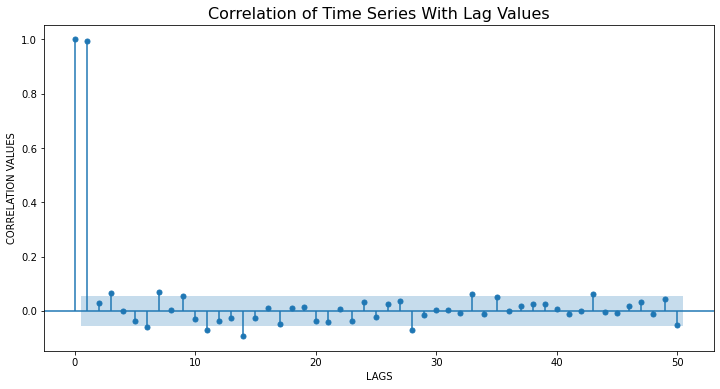

In [11]:
series = data['BRENT'] 
# Plot the autocorrelation using statsmodels
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(series, ax=ax, lags=50)
plt.xlabel("LAGS")
plt.ylabel("CORRELATION VALUES")
plt.title("Correlation of Time Series With Lag Values", fontsize=16)
plt.show()



### Understanding relationship with other variables in the data.

#### <center><font color='#BAB86C'>Average Brent Futures Contract Prices vs Brent Prices Today</font></center>

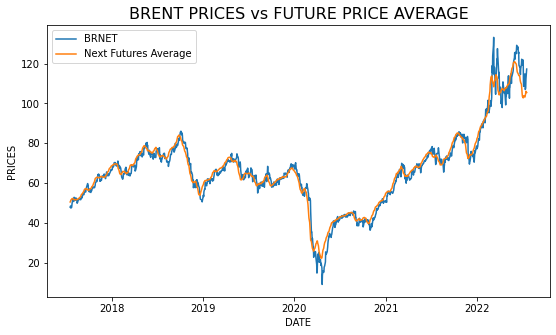

In [12]:
plt.figure(figsize=(9,5))
plt.plot(data['BRENT'], label='BRNET')
plt.plot(data['Next Futures Avg'], label='Next Futures Average')
plt.xlabel("DATE")
plt.ylabel("PRICES")
plt.title("BRENT PRICES vs FUTURE PRICE AVERAGE", fontsize=16)
plt.legend()
plt.show()

#### <center><font color='#BAB86C'>Demand and Supply Estimates vs Brent Prices</font></center>

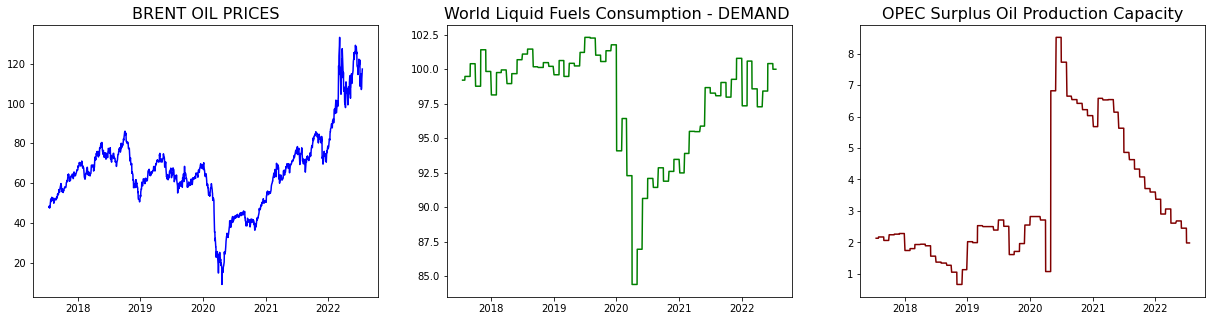

In [21]:
plt.subplots(1,3, figsize=(21, 5))
plt.subplot(1,3,1)
plt.plot(data['BRENT'], color='blue')
plt.title("BRENT OIL PRICES", fontsize=16)
plt.subplot(1,3,2)
plt.plot(data['Total World Liquid Fuels Consumption'], color='green')
plt.title("World Liquid Fuels Consumption - DEMAND ", fontsize=16)
plt.subplot(1,3,3)
plt.plot(data['OPEC Total Surplus Crude Oil Production Capacity'], color='maroon')
plt.title('OPEC Surplus Oil Production Capacity', fontsize=16)
plt.show()


#### <center><font color='#BAB86C'>Other Commodities Prices vs Brent Prices</font></center>

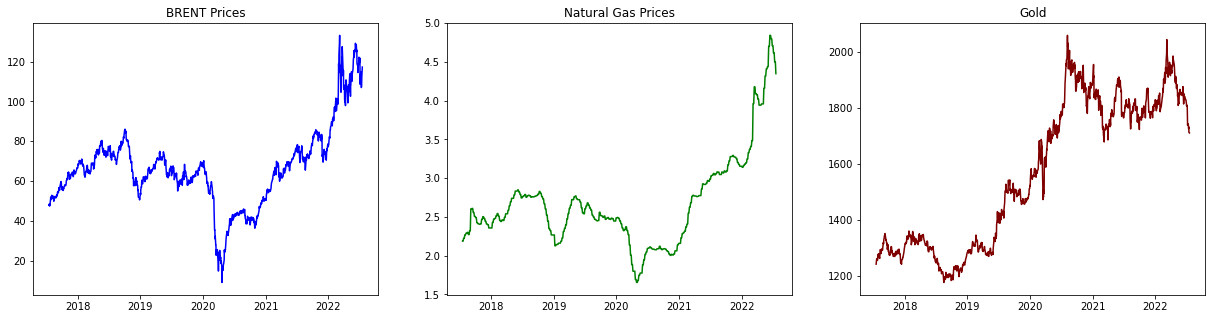

In [22]:
plt.subplots(1,3, figsize=(21, 5))
plt.subplot(1,3,1)
plt.plot(data['BRENT'], color='blue')
plt.title('BRENT Prices')
plt.subplot(1,3,2)
plt.plot(data['GASREGCOVW'], color='green')
plt.title('Natural Gas Prices')
plt.subplot(1,3,3)
plt.plot(data['Gold'], color='maroon')
plt.title('Gold')
plt.show()

## <font color='#FBD5AB'>Stationarity</font>
#### We difference the time series to make it stationary. We do it for the following reasons:


- REDUCE RELIANCE ON IMMIDEATE LAGS
- REMOVES SEASONAL TREND

#### Data available on daily basis was differenced only. Differencing variables on coerse levels leads to sparse vectors.

In [23]:

### Defining Constant and Varying Columns
constant_cols = [
    'D:AE:AED:A',
    'GASREGCOVW',
    'FFER', 
    'Total OPEC Production',
    'OPEC Total Surplus Crude Oil Production Capacity',
    'Total World Liquid Fuels Consumption', 
    'Saudi Arabia Crude Oil Production',
    'OPEC Total Crude Oil Production',
    'OPEC Total Crude Oil Production Capacity',
    'Total non-OPEC Liquids Petroleum Production',
    'Total OECD Liquid Fuels Consumption',
    'Total non-OECD Liquid Fuels Consumption',
    'WUIGLOBALWEIGHTAVG',
    'HCPI',
    'EPI',
    'GDP_WORLD'
]

varying_cols = [
    i for i in data.columns if i not in constant_cols
]


## actual data for dedifferncing and validation
data_actual = data.iloc[1:, :]



### DIFFERENCE THE DATA
to_differnce = data[varying_cols] 
to_not_difference = data[constant_cols]


#### Get diferrenced data
to_differnce = to_differnce.diff().dropna()

## merge data 
data = pd.merge(to_differnce, to_not_difference, how='left', left_index=True, right_index=True)




### Will Need this in future ###
feature_cols = data.columns.tolist()

#### <center><font color='#BAB86C'>Visualize Trends for Stationary Time Series</font></center>

#### Below we use Exponential Smoothing functions to decompose the dataset into different components:

- General trend
- Seasonal trend

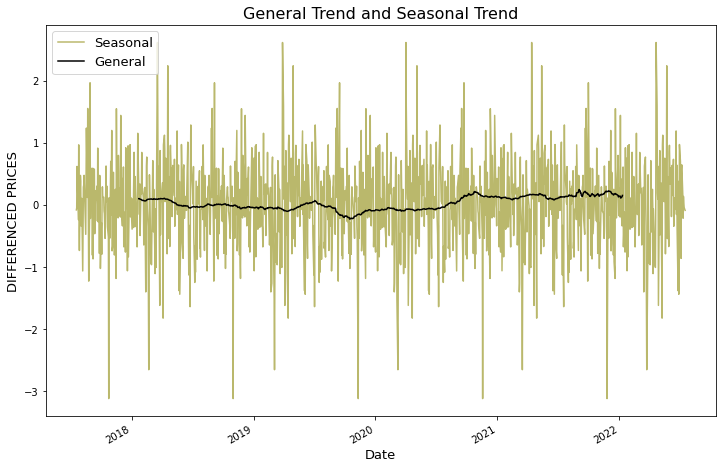

In [30]:
### Decomposing our time series using ETS
decomposition = sm.tsa.seasonal_decompose(data['BRENT'], model='additive', period=260)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('General Trend and Seasonal Trend', fontsize=16)
# decomposition.observed.plot(ax=ax, legend=False)
decomposition.seasonal.plot(ax=ax, legend=False, color='#BAB86C')
decomposition.trend.plot(ax=ax, legend=False, color='black')

# decomposition.resid.plot(ax=ax, legend=False)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('DIFFERENCED PRICES', fontsize= 13)
ax.legend(['Seasonal', 'General'], fontsize=13)
plt.show()

#### <center><font color='#BAB86C'>Visualize Lag Correlations for Stationary Time Series</font></center>

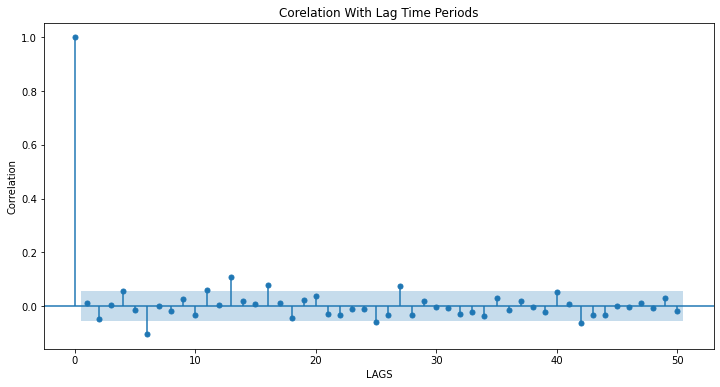

In [31]:
series = data['BRENT'] 
# Plot the autocorrelation using statsmodels
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(series, ax=ax, lags=50)
plt.xlabel('LAGS')
plt.ylabel("Correlation")
plt.title("Corelation With Lag Time Periods")
plt.show()

## <font color='#FBD5AB'>Machine Learning to Determine Complex Relations</font>

#### Use Machine Learning models built-in method to perform feature selection, and at the same time evaluate different models performance on a validation dataset.  

#### Creating a lagged data for Supervised Learning Techniques

In [63]:
### adding lagged variables to our data
num_lags = 20
for i in data.columns:
    for j in range(1, num_lags + 1):
        data['Lag' + str(j) + ' ' + str(i)] = data[i].shift(j)


### selecting columns for only lagged variables.
lag_vars = [i for i in data.columns if i.startswith('Lag')]
lagged_data = data[['BRENT'] + lag_vars]
lagged_data = lagged_data.dropna()

### Spilting the data into train, validation and test split.

In [64]:
train_size = int(len(lagged_data)*0.8)
train_data = lagged_data.iloc[:train_size, :]
test_data = lagged_data.iloc[train_size:, :]


# Split your data into features and target variable
X_train = train_data.drop('BRENT', axis=1)
y_train = train_data['BRENT']


X_test = test_data.drop('BRENT', axis=1)
y_test = test_data['BRENT']

#### Get de-differenced series for de_differencing later on

In [65]:
#### Get de-differenced series for de_differencing later on
de_differencing_series = data_actual.loc[data_actual.index.isin(y_train.index), 'BRENT']
val_series = data_actual.loc[data_actual.index.isin(y_test.index), 'BRENT']

### Define Functions

In [66]:
def feature_importance(feature_list, title):
    ''' 
    The function looks at the important lags identified by the model
    and counts them for each variable and makes a plot accordingly.

    Inputs: 
        important features
        title of the plot
    
    Output:
        A bar plot in sorted order
    '''
    ### creates a counter dictionary and stores the 
    ### counts of lags for each corresponding variables
    Feature_Count = {i:0 for i in feature_cols}
    for i in Feature_Count:
        for j in feature_list:
            if i in j:
                Feature_Count[i] += 1

    ### creat a data frame of the counter dictionary
    feature_imp = pd.DataFrame(list(Feature_Count.items()), columns=['Feature', 'Importance'])
    ### sort the data frame
    feature_imp = feature_imp.sort_values(by = 'Importance', ascending=True)

    # Create horizontal bar plot
    plt.barh(feature_imp['Feature'], feature_imp['Importance'])
    plt.xlabel('Value')
    plt.ylabel('Count of Lags')
    plt.title(title)

#### Converting predictions back to the original trend

In [67]:
def dedifference(predictions, series):
    last = series.iloc[-1]
    new_preds = []
    for i in predictions:
        new_preds.append(i + last)
        last = i + last
    return pd.Series(new_preds)

### <font color='#FFA07A'>LASSO REGRESSION</font>

In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error


# Create a Lasso regression model
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
Lasso_model_predictions = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, Lasso_model_predictions)
# Get the coefficients of the model
coef = pd.Series(lasso.coef_, index=X_train.columns)
# Select the most important features
lasso_important_features = coef[coef != 0].index.tolist()

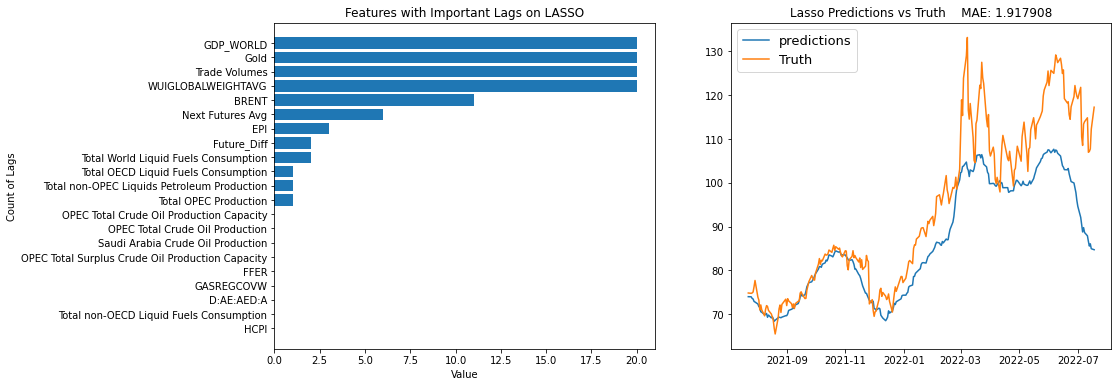

In [70]:
### Code to plot 
plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1,2,1)
feature_importance(lasso_important_features, 'Features with Important Lags on LASSO')
plt.subplot(1,2,2)
Lasso_model_predictions = dedifference(Lasso_model_predictions, de_differencing_series)
Lasso_model_predictions.index = val_series.index
plt.plot(Lasso_model_predictions, label='predictions')
plt.plot(val_series, label='Truth')
plt.legend(fontsize=13)
plt.title('Lasso Predictions vs Truth    ' + f'MAE: {lasso_mae:2f}')
plt.show()


##### TO EXPLORE ANY NON LINEAR TRENDS, WE TURN TO `TREE BASED MODELS` AND USE `INFORMATION GAIN` TO UNDERSTAND FEATURE IMPORTANCE.  

#### <font color='#FFA07A'>Random Forest</font>

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model with n_estimators=100
rf = RandomForestRegressor(n_estimators=20)

# Fit Random Forest model
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mae = mean_absolute_error(rf_predictions, y_test)

In [72]:
# Get feature importances
importances = rf.feature_importances_

# Create Pandas dataframe for feature importances
df_importances = pd.DataFrame(list(zip(X_train.columns, importances)), columns=['Feature', 'Importance'])

# Sort dataframe by importance column in descending order
df_importances = df_importances.sort_values('Importance', ascending=False)

rf_imp_features = list(df_importances.iloc[:60].Feature)

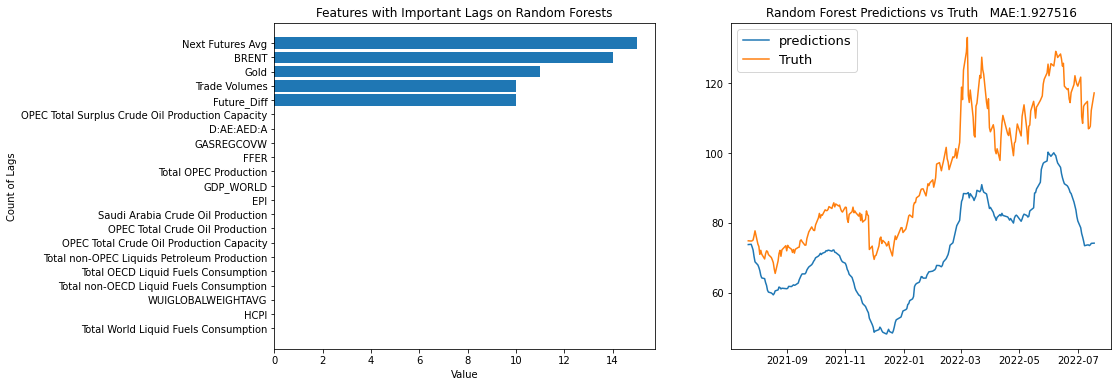

In [73]:
### Code to plot 
plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1,2,1)
feature_importance(rf_imp_features, 'Features with Important Lags on Random Forests')
plt.subplot(1,2,2)
rf_predictions = dedifference(rf_predictions, de_differencing_series)
rf_predictions.index = val_series.index
plt.plot(rf_predictions, label='predictions')
plt.plot(val_series, label='Truth')
plt.legend(fontsize=13)
plt.title('Random Forest Predictions vs Truth' + f'   MAE:{rf_mae:3f}')
plt.show()

#### <font color='#FFA07A'>Gradient Boosting</font>

In [74]:
import xgboost as xgb
# Initialize XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.5)

# Fit XGBoost model
xg_reg.fit(X_train, y_train)
xg_predictions = xg_reg.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xg_predictions)
# Get feature importance
importance = xg_reg.get_booster().get_score(importance_type='weight')

# Create Pandas dataframe for feature importance
xgb_importances = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
xgb_importances = xgb_importances.sort_values('Importance', ascending=False)

## Take top 20 important features
xgb_imp_features = list(xgb_importances.iloc[:60, 0])

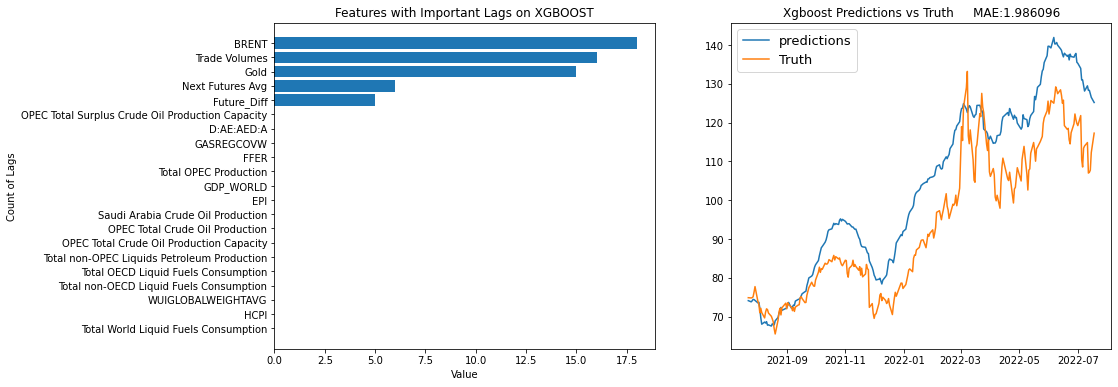

In [75]:
### Code to plot 
plt.subplots(1,2, figsize=(15, 6))
plt.subplot(1,2,1)
feature_importance(xgb_imp_features, 'Features with Important Lags on XGBOOST')
plt.subplot(1,2,2)
xg_predictions = dedifference(xg_predictions, de_differencing_series)
xg_predictions.index = val_series.index
plt.plot(xg_predictions, label='predictions')
plt.plot(val_series, label='Truth')
plt.legend(fontsize=13)
plt.title('Xgboost Predictions vs Truth' + f'     MAE:{xgb_mae:3f}')
plt.show()

#### WHY I DECIDED TO NOT USE THESE MODELS FOR EITHER PREDICTION OR FOR DETEMINING FEATURE IMPORTANCE. 


##### PREDICTION

- CANNOT MULTIPLE PREDICTION INTO FUTURE WITH TURNING TO A `RECURSIVE MODEL` OR `WITHOUT FORGOING THE USE OF IMMIDEATE LAGS`


##### FEATURE IMPORTANCE

- LASSO MODEL: UNABLE TO UNDERSTAND NON_LINEAR RELATIONSHIPS
- TREE BASED MODELS: FOCUSES MORE ON GRANULAR LEVEL VARIABLES, AS NOT MANY SPLITS ARE PERFORMED ON COERSE LEVEL VARIABLED